# 9 Support Vector Machines

## 9.1 Maximal Margin Classifier

### 9.1.1 What Is a Hyperplane?

The mathematical definition of a hyperplane in 2D space
\begin{align}\tag{9.1}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0\mathrm{.}
\end{align}
Basically, it is a line. Equation 9.1 can be easily extended to th $p$-dimensional setting:
\begin{align}\tag{9.2}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p = 0
\end{align}
What we are interested in is where do points exist in relation to this hyperplane:
\begin{align}\tag{9.3}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p > 0\mathrm{,}
\end{align}
defines one side of the hyperplane, and
\begin{align}\tag{9.4}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p < 0\mathrm{,}
\end{align}
defines the other side of the hyperplane. In this sense the hyperplane acts as a classification marker as to what region a point $(X_1, X_2, \ldots, X_p)^T$ lies.

---

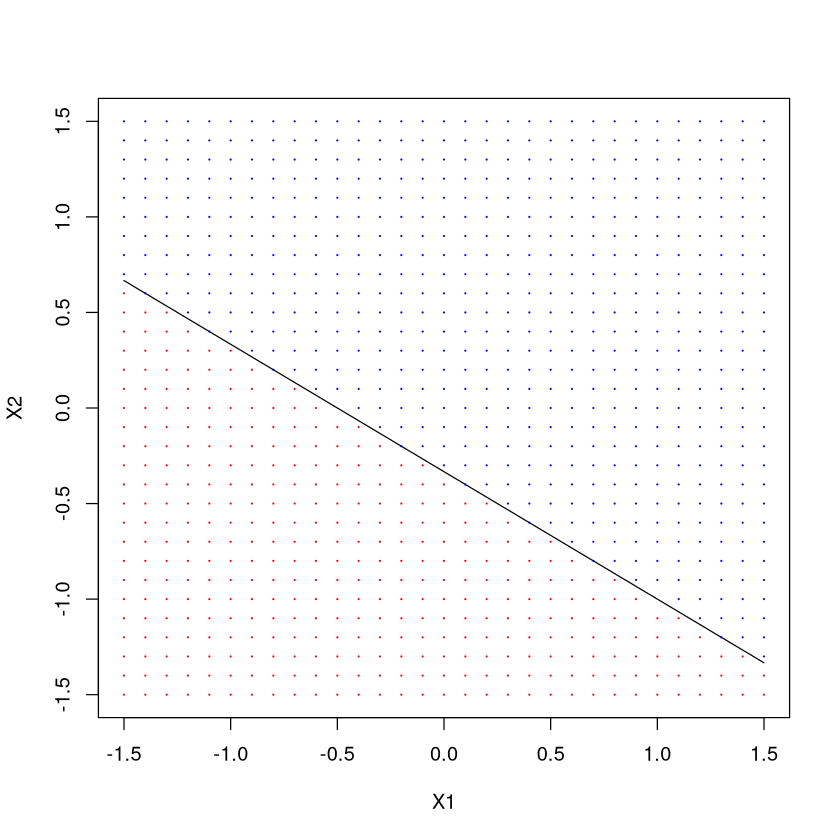

In [1]:
x <- seq(-1.5,1.5,by=.1)
hyper <- function(x) -(1 + 2*x)/3
plot(x, hyper(x), type="l", xlab="X1", ylab="X2", ylim=c(-1.5, 1.5), xlim=c(-1.5,1.5))
X1 = c()
X2 = c()
for (x1 in x) {
    for (x2 in x) {
        X1 = c(X1, x1)
        X2 = c(X2, x2)
    }
}
color <- "red"
color[X2>hyper(X1)] <- "blue"
color[X2<hyper(X1)] <- "red"
points(X1, X2, col=color, cex=.1)
rm(list=ls())

__FIGURE 9.1__. The hyperplane $1 + 2X_1 + 3X_2 = 0$ is shown. The blue region is the set of points for which $1 + 2X_1 + 3X_2 > 0$, and the red is the set of points for which $1 + 2X_1 + 3X_2 < 0$.

---

### 9.1.2 Classification Using a Separating Hyperplane

Suppose we have a $n \times p$ data matrix $X$ that consists of $n$ training observations in $p$-dimensional space,
\begin{align}\tag{9.5}
x_1 = 
\begin{pmatrix}
x_{11} \\
\vdots \\
x_{1p}
\end{pmatrix}\mathrm{,}
\cdots \mathrm{,} x_n =
\begin{pmatrix}
x_{n1} \\
\vdots \\
x_{np}
\end{pmatrix} \mathrm{,}
\end{align}
and that these observations fall into two classes&mdash;that is, $y_1,\ldots,y_n \in \{-1, 1\}$ where $-1$ represents one class and $1$ the other class.  

We also have test observations, a $p$-vector of observed features $x^* = (x_1^* \ \ \ldots \ \ x_p^*)^T$. Our goal is to develop a classifier based on the training data that will correctly classify the test observation using its feature measurements. Our classifier will be based on the concept of a _separating hyperplane_.

---

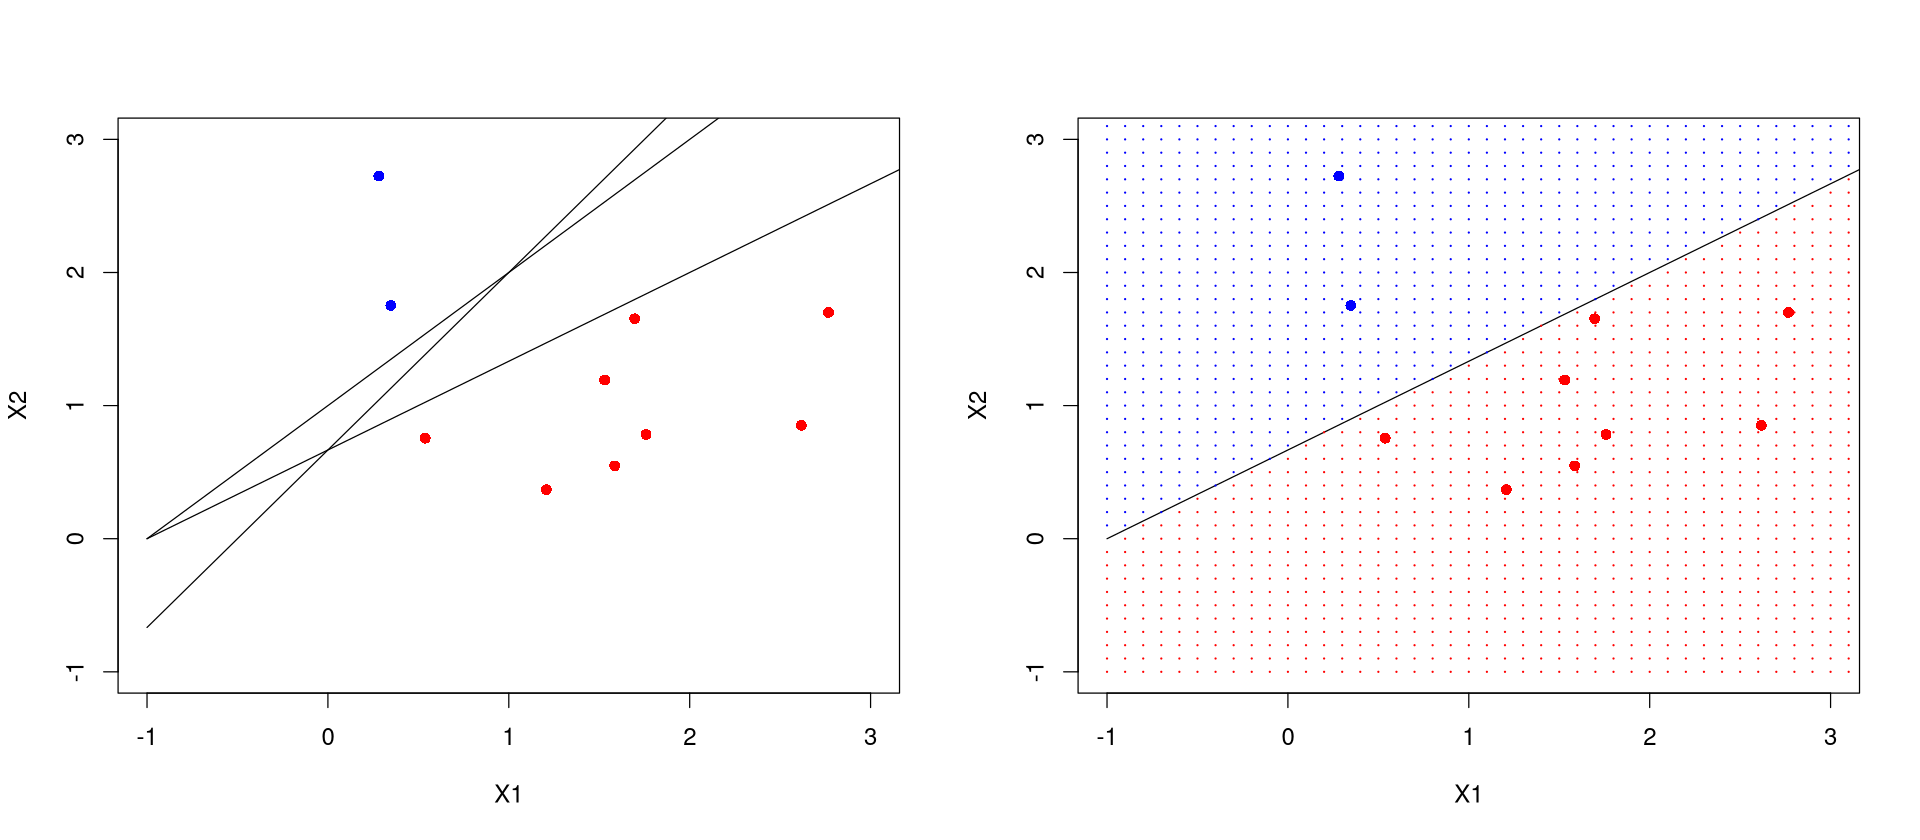

In [7]:
set.seed(3)
par(mfrow = c(1, 2), cex=1.2)
options(repr.plot.width=16, repr.plot.height=7)
x <- seq(-1,4,by=.1)
hyper1 <- function(x) (2 + 2*x)/3
hyper2 <- function(x) (3 + 3*x)/3
hyper3 <- function(x) (2 + 4*x)/3
xn <- 1.5 + rnorm(10)
yn <- 1.5 + rnorm(10)
plot(x, hyper1(x), type="l", xlab="X1", ylab="X2", ylim=c(-1,3), xlim=c(-1,3))
lines(x, hyper2(x), xlab="X1", ylab="X2")
color.1 <- "red"
color.1[ yn > hyper1(xn) ] <- "blue"
color.1[ yn < hyper1(xn) ] <- "red"
points(xn, yn, pch=16, col=color.1)
lines(x, hyper3(x), xlab="X1", ylab="X2")
plot(x, hyper1(x), type="l", xlab="X1", ylab="X2", ylim=c(-1,3), xlim=c(-1,3))
X1 = c()
X2 = c()
for (x1 in x) {
    for (x2 in x) {
        X1 = c(X1, x1)
        X2 = c(X2, x2)
    }
}
color <- "red"
color[X2>hyper1(X1)] <- "blue"
color[X2<hyper1(X1)] <- "red"
points(X1, X2, col=color, cex=.1)
points(xn, yn, pch=16, col=color.1)
options(repr.plot.width=7, repr.plot.height=7)
rm(list=ls())

__FIGURE 9.2__. Left: There are two classes of observations, shown in blue and in red, each of which has measurements on two variables. Three separating hyperplanes, out of many  possible, are shown in black. Right: A separating hyperplane is shown in black. The blue and red grid indicates the decision rule made by a classifier based on this separating hyperplane: a test observation that falls in the blue portion of the grid will be assigned to the blue class, and a test observation that falls into the red portion of the grid will be assigned to the purple class.

---

The figure on the left show three hyperplanes that separate the training observations perfectly according to their class labels. We label the observations from the blue calss as $y_i=1$ and those from the red class as $y_i=-1$. Then a separating hyperplane has the property that
\begin{align}\tag{9.6}
\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} > 0 \ \ \mathrm{if} \ \ y_i = 1\mathrm{,}
\end{align}
and
\begin{align}\tag{9.7}
\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} > 0 \ \ \mathrm{if} \ \ y_i = 1\mathrm{.}
\end{align}
Equivalently, a separating hyperplane has the property that
\begin{align}\tag{9.8}
y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) > 0
\end{align}
for all $i = 1,\ldots,n$.  

If a separating hyperplane exists, then we use it as a classifier: a test observation is assigned a class depending on which side of the hyperplane it is located. The right hand side of Figure 9.2 shows one such hyperplane classifier.

We classify the test observation $x^*$ based on the sign of $f(x^*) = \beta_0 + \beta_1 x_1^* + \beta_2 x_2^* + \cdots + \beta_p x_p^*$. If $f(x^*)$ is positive, then we assign the test observation to class $1$, and if $f(x^*)$ is negative, then we assign it to class $-1$. The _magnitude of_ $f(x^*)$ can be used to determine class confidence. If $f(x^*)$ is far from zero, then this means that $x^*$ lies far from the hyperplane and so we can be confident about our class assignment for $x^*$. If $f(x^*)$ is close to zero, then $x^*$ is located near the hyperplane, and so we are less certain about the class assignment for $x^*$.

### 9.1.3 The Maximal Margin Classifier

The maximal margin classifier is a separating hyperplane that is farthest from the training observations. That is, we can compute the (perpendicular) distance from each training observation to a given separating hyperplane; the smallest such distance is the minimal distance from the observations to the hyperplane, and is known as the _margin_. The maximal margin hyperplane is the separating hyperplane for which the margin is largest&mdash;that is, it is the hyperplane that has the farthest minimum distance to the training observations. We can then classify a test observation based on which side of the maximal margin hyperplane it lies. This is known as the _maximal margin classifier_. We hope that a classifier that has a large margin on the training data will also have a large margin on the test data, and classify the test observations correctly. Although the maximal margin classifier is often successful, it can also lead to overfitting when $p$ is large.

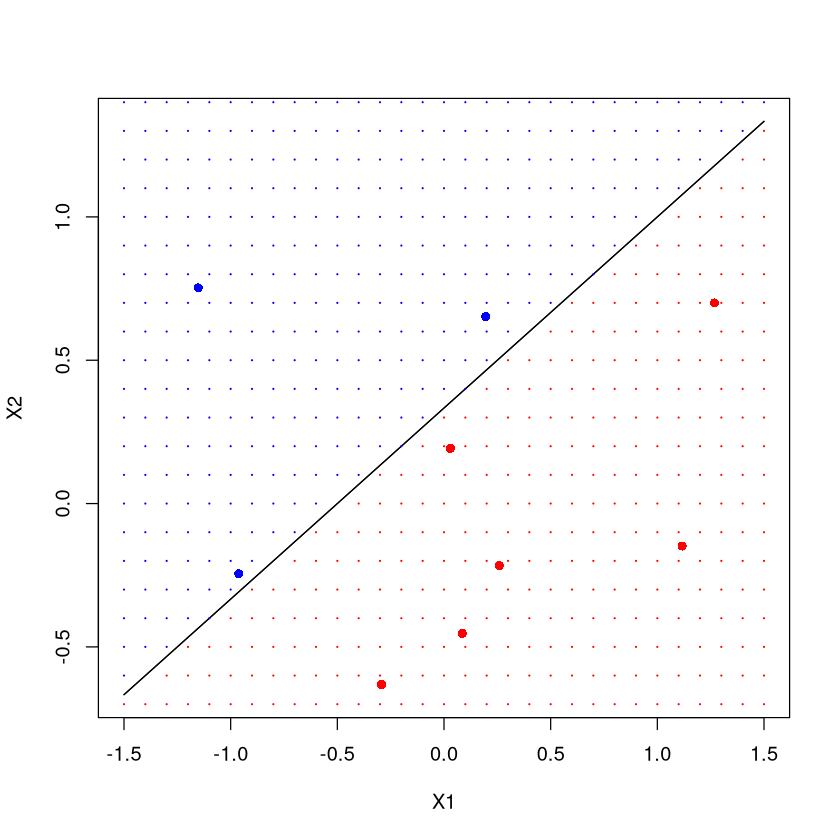

In [3]:
set.seed(3)
xn <- rnorm(10)
yn <- .5 + rnorm(10)
x <- seq(-1.5,1.5,by=.1)
hyper <- function(x) (1 + 2*x)/3
plot(x, hyper(x), type="l", xlab="X1", ylab="X2")
color.1 <- "red"
color.1[ yn > hyper(xn) ] <- "blue"
color.1[ yn < hyper(xn) ] <- "red"
points(xn, yn, pch=16, col=color.1)
lines(x, hyper(x), xlab="X1", ylab="X2")
X1 = c()
X2 = c()
for (x1 in x) {
    for (x2 in x) {
        X1 = c(X1, x1)
        X2 = c(X2, x2)
    }
}
color <- "red"
color[X2>hyper(X1)] <- "blue"
color[X2<hyper(X1)] <- "red"
points(X1, X2, col=color, cex=.1)
rm(list=ls())

__TODO__  
__FIGURE 9.3.__ There are two classes of observations, shown in blue and in red. The maximal margin hyperplane is shown as a solid line. The margin is the distance from the solid line to either of the dashed lines. The two blue points and the red point that lie on the dashed lines are the support vectors, and the distance from those points to the hyperplane is indicated by the arrows. The red and blue grid indicates the decision rule made by a classifier based on this separating hyperplane.

---

### 9.1.4 Construction of the Maximal Margin Classifier

Constructing the maximal margin hyperplane based on a set of $n$ training observations $x_1,\ldots,x_n \in \mathbb{R}^p$ and associated class labels $y_1,\ldots,y_n \in \{-1,1\}$. The maximal margin hyperplane is the solution that to the optimization problem
\begin{align*}
\underset{\beta_0,\beta_1,\ldots,\beta_p,M}{\text{maximize}} M \tag{9.9} \\
\text{subject to} \ \ \sum^p_{j=1}{\beta^2_j}=1\mathrm{,}\tag{9.10} \\
y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) \ge M \ \ \forall \ \ i = 1,\ldots,n \tag{9.11}
\end{align*}

The constraint in (9.11) guarantees that each observation will be on the correct side of the hyperplane, provided that $M$ is positive.  
Equation 9.10 is not really a constraint, since if $\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} = 0$ defines a hyperplane, then so does
$k(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip})=0$ for any $k \ne 0$. Equation 9.10 gives some meaning to (9.11); once can show that with this constraint the perpendicular distance from the $i$th observation to the hyperplane is given by
\begin{align*}
y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip})\text{.}
\end{align*}
Therefore, the constraints (9.10) and (9.11) ensure that each observation is on the correct side of the hyperplane and at least a distance $M$ from the hyperplane. Hence, $M$ represents the margin of our hyperplane, and the optimization problem chooses $\beta_0, \beta_1, \ldots, \beta_p$ to maximize $M$. This is exactly the definition of the maximal margin hyperplane! The probelm (9.9)&ndash;(9.11) can be solved efficiently.  

__TODO__: Find a reference for the details of this optimization.

### 9.1.5 The Non-separable Case

The maximal margin classifier is a very natural way to perform classification, _if a separating hyperplane exists_. However, as we have hinted, in many cases no separating hyperplane exists, and so there is no maximal margin classifier. In this case, the optimization problem (9.9)&ndash;(9.11) has no solution with $M>0$. An example is shown in Figure 9.4. In this case, we cannot _exactly_ separate the two classes. However, as we will see in the next section, we can extend the consept of a separating hyperplane in order to develop a hyperplane that _almost_ separates the classes, using a so-called _soft margin_. The generalizatio of the maximal margin classifier to the non-separable case is known as the _support vector classifier_.

## 9.2 Support Vector Classifiers

### 9.2.1 Overview of the Support Vector Classifier

There are many reasons why a classifier based on a separating hyperplane may not be the best for observation data. In fact, it may be okay to misclassify a few training observations in order to do a better job in classifying the remaining observations. A support vector classifier also called a soft margin classifier does this.  Rather than seeking the largest possible margin so that every observation is not only on the correct side of the hyperplane but also on the correct side of the margin, we instead allow some observations to be on the incorrect side of the margin, or even the incorrect side of the hyperplane.

### 9.2.2 Details of the Support Vector Classifier

The support vector classifies a test observation depending on which side of a hyperplane it lies. The hyperplane is chosen to correctly separate most of the training observations into the two classes, but may misclassify a few observations. It is the solution to the optimization problem
\begin{align*}
\underset{\beta_0,\beta_1,\ldots,\beta_p,M}{\text{maximize}}M \tag{9.12} \\
\text{subject to} \sum^p_{j=1}\beta^2_j = 1\text{,} \tag{9.13} \\
y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) \ge M(1 - \epsilon_i)\text{,} \tag{9.14} \\
\epsilon_i \ge 0\text{,} \sum^n_{i=1} \epsilon_i \le C\text{,} \tag{9.15}
\end{align*}
where $C$ is a nonnegative tuning parameter.  
As in (9.11), $M$ is the width of the margin; we seek to make this quantity as large as possible.  
In (9.14), $\epsilon_1,\ldots,\epsilon_n$ are _slack variables_ that allow individual observations to be on the wrong side of the margin or the hyperplane.

Once we have solved (9.12)&ndash;(9.15), we classify a test observation $x^*$ as before, by simply determining on which side of the hyperplane it lies. That is, we classify the test observation based on the sign of $f(x^*) = \beta_0 + \beta_1 x^*_1 + \cdots + \beta_p x^*_p$.

The slack varaiable $\epsilon_i$ tells us where the $i$th observation is located, relative to the hyperplane and relative to the margin. If $\epsilon_i = 0$ then the $i$th observation is on the correct side of the margin.

If $\epsilon_i > 0$ then the $i$th observation is on the wrong side of the margin, and we say that the $i$th observation has _violated_ the margin. If $\epsilon_i > 1$ then it is on the wrong side of the hyperplane.  

C bounds the sum of the $\epsilon_i$'s, and so determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate. We can think of the $C$ parameter as a _budget_ for the amount that the margin can be violated by the $n$ observations.  In practice, $C$ is a tuning parameter that is generally chosen via cross-validation. $C$ controls the bias-variance trade-off of the statistical learning technique. When $C$ is small, we seek narrow margins that are rarely violated; a highly fit classifier to the data (low bias / high variance). When $C$ is large, the margin is wider and we allow more violations to it; this is less fit classifier (high bias / low variance).

The optimization problem (9.12)&ndash;(9.15) has an interesting property. Only observations that either lie on the margin or that violate the margin will affect the hyperplane, and hence the classifier obtained. These observations are called _support vectors_. Observations that lie on the correct side of the margin does not affect the support vector classifier.

## 9.3 Support Vector Machines

### 9.3.1 Classification with Non-Linear Decision Boundaries

For some non-linear class boundaries, a support vector classifier will perform poorly. In Chapter 7, we faced an analogous situation with linear regresion. In those cases we enlarged the feature space using function of the predictors, such as quadratic and cubic terms to address the non-linearity. We can try to do the same with support vector classifier. For instance, instead of fitting a support vector classifier using $p$ features
\begin{align*}
X_1, X_2, \ldots, X_p\text{,}
\end{align*}
we could instead fit a support vector classifier using $2p$ features
\begin{align*}
X_1, X^2_1, X_2, X^2_2, \ldots, X_p, X^2_p \text{.}
\end{align*}
Then (9.12)&ndash;(9.15) would become
\begin{align*}
\underset{\beta_0, \beta_{11}, \beta_{12}, \ldots, \beta_{p2}, \epsilon_1, \ldots, \epsilon_n, M}{\text{maximize}}M \tag{9.16} \\
\text{subject to } y_i \left( \beta_0 + \sum^p_{j=1} \beta^2_{j1} x_{ij} + \sum^p_{j=1} \beta_{j2} x^2_{ij} \right) \ge M(1 - \epsilon_i) \text{,} \\
\sum^n_{i=1} \epsilon_i \le C \text{,}\ \ \epsilon_i \ge 0\text{,} \ \ \sum^p_{j=1} \sum^2_{k=1} \beta^2_{jk} = 1\text{.}
\end{align*}

In the enlarged feature space, the decision boundary that results from (9.16) is in fact linear. But in the orginal feature space, the decision boundary is of the form $q(x) = 0$, where $q$ is a quadratic polynomial, and its solutions are generally non-linear. One might additionally want to enlarge the feature space with higher-order polynomial terms, or with interaction terms of the form $X_jX_{j'}$ for $j \ne j'$. Alternatively, other functions of the predictors could be considered rather than polynomials. It is not hard to see that there are many possible ways to enlarge the feature space, and that unless we are careful, we could end up with a huge number of features. Then computations would become unmanageable. The support vector machine, which we present next, allows us to enlarge the feature space used by the support vector classifier in a way that leads to efficient computations.

### 9.3.2 The Support Vector Machine

The _support vector machine_ (SVM) is an extension of the support vector classifier that results from enlarging the feature space in a specific way using _kernels_. The basic premise is that we want to enlarge the feature space in order to accommodate a non-linear boundary between classes.

The solution to the support vector classifier problem (9.12)&ndash;(9.15) involves only the _inner products_ of the observations (as opposed to the observations themselves). The inner product of two $r$-vectors $a$ and $b$ is defined as $\langle a, b \rangle = \sum^r_{i=1} {a_i b_i}$. Thus the inner product of two observations $x_i$, $x_{i'}$ is given by
\begin{align*}
\langle x_i, x_{i'} \rangle = \sum^p_{j=1} x_{ij} x_{i'j} \text{.} \tag{9.17}
\end{align*}
It can be shown that
* The linear support vector classifier can be represented as
\begin{align*}
f(x) = \beta_0 + \sum^n_{i=1}{\alpha_i \langle x, x_i \rangle} \text{,} \tag{9.18}
\end{align*}
where there are $n$ parameters $\alpha)i$, $i=1,\ldots,n$, one per training observation.
* To estimate the parameters $\alpha_1,\ldots,\alpha_n$ and $\beta_0$, all we need are the $\binom{n}{2}$ inner products $\rangle x_i, x_{i'} \langle$ between all parts of training observations.

Notice that in (9.18), in order to evaluate the function $f(x)$, we need to compute the inner product between the new point  $x$ and each of the training points $x_i$. However, it turns out that $\alpha_i$ is nonzero only for the support vectors in the solution&mdash;that is, if a training observation is not a support vector, then its $\alpha_i$ equals zero. So if $S$ is the collection of indices of these support points, we can rewrite any solution function of the form (9.18) as
\begin{align*}
f(x) = \beta_0 + \sum_{i \in S}{\alpha_i \langle x, x_i \rangle}\text{,} \tag{9.19}
\end{align*}
which typically involves far fewer terms than in (9.18).

To summarize, in representing the linear cleassifier $f(x)$, and in computing its coefficients, all we need are inner products.  

So now what we do is we replace the inner product (9.17) that appears in (9.18) with a more general equation
\begin{align*}
K(x_i, x_{i'})\text{,} \tag{9.20}
\end{align*}
where $K$ is some function referred to as a _kernel_. A kernel is a function that quantifies the similarity of two observations. An example is that the _support vector classifier_ is represented by
\begin{align*}
K(x_i, x_{i'}) = \sum^p_{j=1} {x_{ij} x_{i'j}}\text{,} \tag{9.21}
\end{align*}
this is also called the _linear_ kernel. The linear kernel essentially quantifies the similarity of a pair of observations using Pearson (standard) correlation. But one could replace every instance of $\sum^p_{j=1} {x_{ij} x_{i'j}}$ with the quantity
\begin{align*}
K(x_i, x_{i'}) = (1 + \sum^p_{j=1}{(x_{ij} x_{i'j})^d} \text{.} \tag{9.22}
\end{align*}
This is called the _polynomial kernel_ of degree $d$, where $d$ is a natural number ($d \in \mathbb{N}$) and creates a more flexible decision boundary.
\begin{align*}
f(x) = \beta_0 + \sum_{i \in S}{ \alpha_i K(x, x_i) }\text{.} \tag{9.23}
\end{align*}
Another popular kernel is the _radial kernel_
\begin{align*}
K(x_i, x_{i'}) = \exp(- \gamma \sum^p_{j=1}{ (x_{ij} - x_{i'j})^2 })\text{.} \tag{9.24}
\end{align*}
In (9.24), $\gamma$ is a positive constant.

### 9.3.3 An Application to the Heart Disease Data